In [1]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from model_utils import *
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 10)})

In [2]:
model = "random_forest"
REPETITIONS = 10 # groupby candidato e paredao

In [3]:
params = PARAMETERS[model]
regressor = MODELS[model]
normalize = NORMALIZE[model]

In [4]:
data_df = get_data(drop_columns=REMOVE, normalize=normalize)
x, y = data_df.drop(columns=["paredao", "nome", "rejeicao"], axis=1).to_numpy(), data_df.drop(columns=data_df.columns[:-1], axis=1).to_numpy()
y = np.ravel(y)

In [5]:
paredoes_df = pd.DataFrame()
for i in tqdm(range(REPETITIONS), desc="- Iteration:"):
    data_df = get_data(drop_columns=REMOVE, normalize=normalize)
    reg = regressor(**params)
    preds = cross_val_predict(reg, x, y, cv=10, n_jobs=5)
    data_df["predicao"] = preds
    data_df["erro_absoluto"] = abs(data_df["rejeicao"] - data_df["predicao"])
    data_df["repeticao"] = i
    paredoes_df = paredoes_df.append(data_df, ignore_index=True)

- Iteration:: 100%|██████████| 10/10 [00:05<00:00,  1.71it/s]


In [6]:
# Agrupando e traçando médias
paredoes_df = paredoes_df.groupby(["paredao", "nome"]).mean()
paredoes_df.reset_index(inplace=True)

In [7]:
paredoes_df[["paredao", "nome", "rejeicao", "predicao", "erro_absoluto"]].sort_values(by="erro_absoluto")

,paredao,nome,rejeicao,predicao,erro_absoluto
15,6,guilherme,0.5607,0.565041,0.011542
17,7,babu,0.0460,0.033384,0.012616
10,4,victor_hugo,0.3608,0.363102,0.013301
6,3,felipe_prior,0.2029,0.199259,0.014640
27,10,manu_gavassi,0.4251,0.451668,0.026568
37,13,thelma,0.3653,0.392873,0.027573
21,8,pyong,0.5170,0.481407,0.035593
34,12,marcela,0.4976,0.534551,0.036951
20,8,babu,0.4771,0.516756,0.039656
24,9,flayslene,0.0954,0.138387,0.042987


# Plot de real x predito

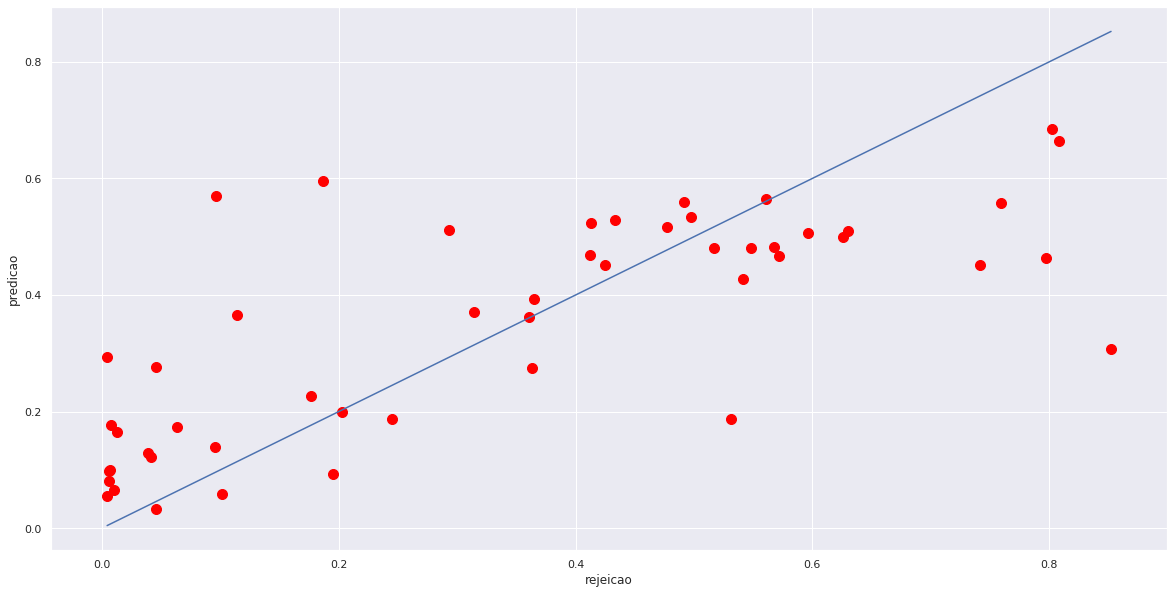

In [8]:
paredoes_df.plot.scatter(x="rejeicao", y="predicao", c="red", s=100)
x_min, x_max = paredoes_df["rejeicao"].min(), paredoes_df["rejeicao"].max()
y_min, y_max = paredoes_df["predicao"].min(), paredoes_df["predicao"].max()
range = [min(x_min, y_min), max(x_max, y_max)]
plt.plot(range, range)

In [9]:
y_real = paredoes_df["rejeicao"].values
pred = paredoes_df["predicao"].values
for metric in METRICS.keys():
    print("{}: {}".format(metric, METRICS[metric](y_real, pred)))

mse: 0.031428659790938
mae: 0.12965547606735206
r2: 0.5532621654552397


# Correlação de real x predito

In [10]:
cor = paredoes_df[["rejeicao", "predicao"]].corr()

In [11]:
cor["rejeicao"]

rejeicao    1.000000
predicao    0.745481
Name: rejeicao, dtype: float64